In [115]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
%matplotlib inline

In [116]:
# Константы
L_1000 = np.float64(132.87) # мГн
R_1000 = np.float64(13.491) # Ом
T0 = np.float64(0.01) # с
pi = np.float(3.14)

In [117]:
def open_csv(name):
    file = pd.read_csv(name)
    file = file.drop(0)
    for col in file.columns:
        file[col] = [i if type(i) != type('a') else np.float64('.'.join(i.split(','))) for i in file[col]]
        file[col] = [np.float64(i) for i in file[col]]
    return file

In [118]:
table1 = open_csv("point1.csv")
table1['$T_{теор}$, с'] = 2*pi*(L_1000 / 1000 * table1[table1.columns[0]] / 1000000)**0.5
table1

,"$C$, мкф","$x_0$, дел","$x$, дел",$n$,"$T$, с","$T_{теор}$, с"
1,0.1,6.4,0.9,2.0,0.000703,0.000724
2,0.2,6.4,0.6,1.0,0.000937,0.001024
3,0.3,6.2,3.0,4.0,0.001210,0.001254
4,0.4,6.2,3.6,4.0,0.001452,0.001448
5,0.5,6.2,4.8,5.0,0.001548,0.001619
6,0.6,6.2,5.2,5.0,0.001677,0.001773
7,0.7,6.2,4.6,4.0,0.001855,0.001915
8,0.8,6.2,4.8,4.0,0.001935,0.002047
9,0.9,6.2,5.2,4.0,0.002097,0.002172


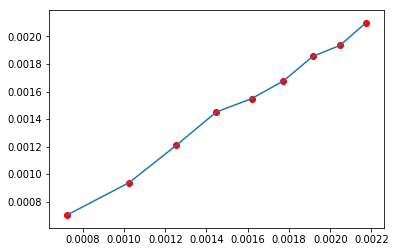

In [119]:
plt.plot(table1[table1.columns[5]], table1[table1.columns[4]])
plt.scatter(table1[table1.columns[5]], table1[table1.columns[4]], color='r')
plt.show()

In [120]:
table2 = open_csv("point2.csv")
table2['$R_{конт}$, Ом'] = table2[table2.columns[0]] + R_1000
table2[r'$\Theta$'] = (table2[table2.columns[1]] / table2[table2.columns[2]])
table2[r'$\Theta$'] = table2[r'$\Theta$'].apply(math.log)
table2[r'$\Theta$'] = table2[r'$\Theta$'] / table2[table2.columns[3]]
table2

,"$R$, Ом",$U_k$,$U_{k+n}$,$n$,"$R_{конт}$, Ом",$\Theta$
1,250.0,3.6,0.6,6.0,263.491,0.298627
2,300.0,3.6,0.4,6.0,313.491,0.366204
3,350.0,3.6,0.3,6.0,363.491,0.414151
4,400.0,3.6,0.2,6.0,413.491,0.481729
5,450.0,3.6,0.2,6.0,463.491,0.481729
6,500.0,3.6,0.2,5.0,513.491,0.578074
7,550.0,4.6,0.6,3.0,563.491,0.678961


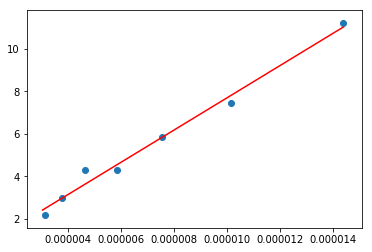

In [124]:
x = np.array(1/table2[table2.columns[4]]**2)
y = np.array(1/table2[table2.columns[5]]**2)

# Прямая по МНК
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
x_extr = np.linspace(0.97* x.min(), x.max(), 10)
# a - коэффициент наклона прямой, b - свободный член
plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
plt.scatter(x,y)
        
#Определим погрешности коэффициентов a и b для 1 графика
x_avg = np.average(x)
y_avg = np.average(y)
x_sqr_avg = np.average([i**2 for i in x])
y_sqr_avg = np.average([i**2 for i in y])
a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x))**0.5
b_err = a_err * (x_sqr_avg - x_avg**2)**0.5
plt.show()

In [125]:
R_kr = 2 * pi * a ** 0.5 / 1000
R_kr_t = 2 * pi * (L_1000 * 1000 / table1[table1.columns[0]][2]) ** 0.5 / 1000
print('Критическое сопротивление:')
print('Теоретическое:', R_kr_t.round(2), 'кОм')
print('Экспериментальное:', R_kr.round(2), 'кОм')

Критическое сопротивление:
Теоретическое: 5.12 кОм
Экспериментальное: 5.47 кОм


In [126]:
Q_max = np.float64(pi / table2[table2.columns[5]][1])
Q_max_t = np.float64((1000 * L_1000 / table1[table1.columns[0]][1])**0.5 / table2[table2.columns[0]][1])
Q_min = np.float64(pi / table2[table2.columns[5]][7])
Q_min_t = np.float64((1000 * L_1000 / table1[table1.columns[0]][7])**0.5 / table2[table2.columns[0]][7])
print('Добротность при минимальном логарифмическом дикременте затухания:\nТеоретическая: {Q_t}\nЭкспериментальная: {Q}'.format(Q=Q_max.round(2), Q_t=Q_max_t.round(2)))
print('Добротность при максимальном логарифмическом дикременте затухания:\nТеоретическая: {Q_t}\nЭкспериментальная: {Q}'.format(Q=Q_min.round(2), Q_t=Q_min_t.round(2)))

Добротность при минимальном логарифмическом дикременте затухания:
Теоретическая: 4.61
Экспериментальная: 10.51
Добротность при максимальном логарифмическом дикременте затухания:
Теоретическая: 0.79
Экспериментальная: 4.62
